<a href="https://colab.research.google.com/github/abhirukth/Data-Sci.-File/blob/main/Heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import math

In [ ]:
df_heart = pd.read_csv('/content/heart.csv')
df_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


It's so much satisfying when there are no NULL values in the dataset 😊

In [ ]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### A super plot, describing relations with all variables with each other taking 'output' (whether there are chances of heart attack) into account

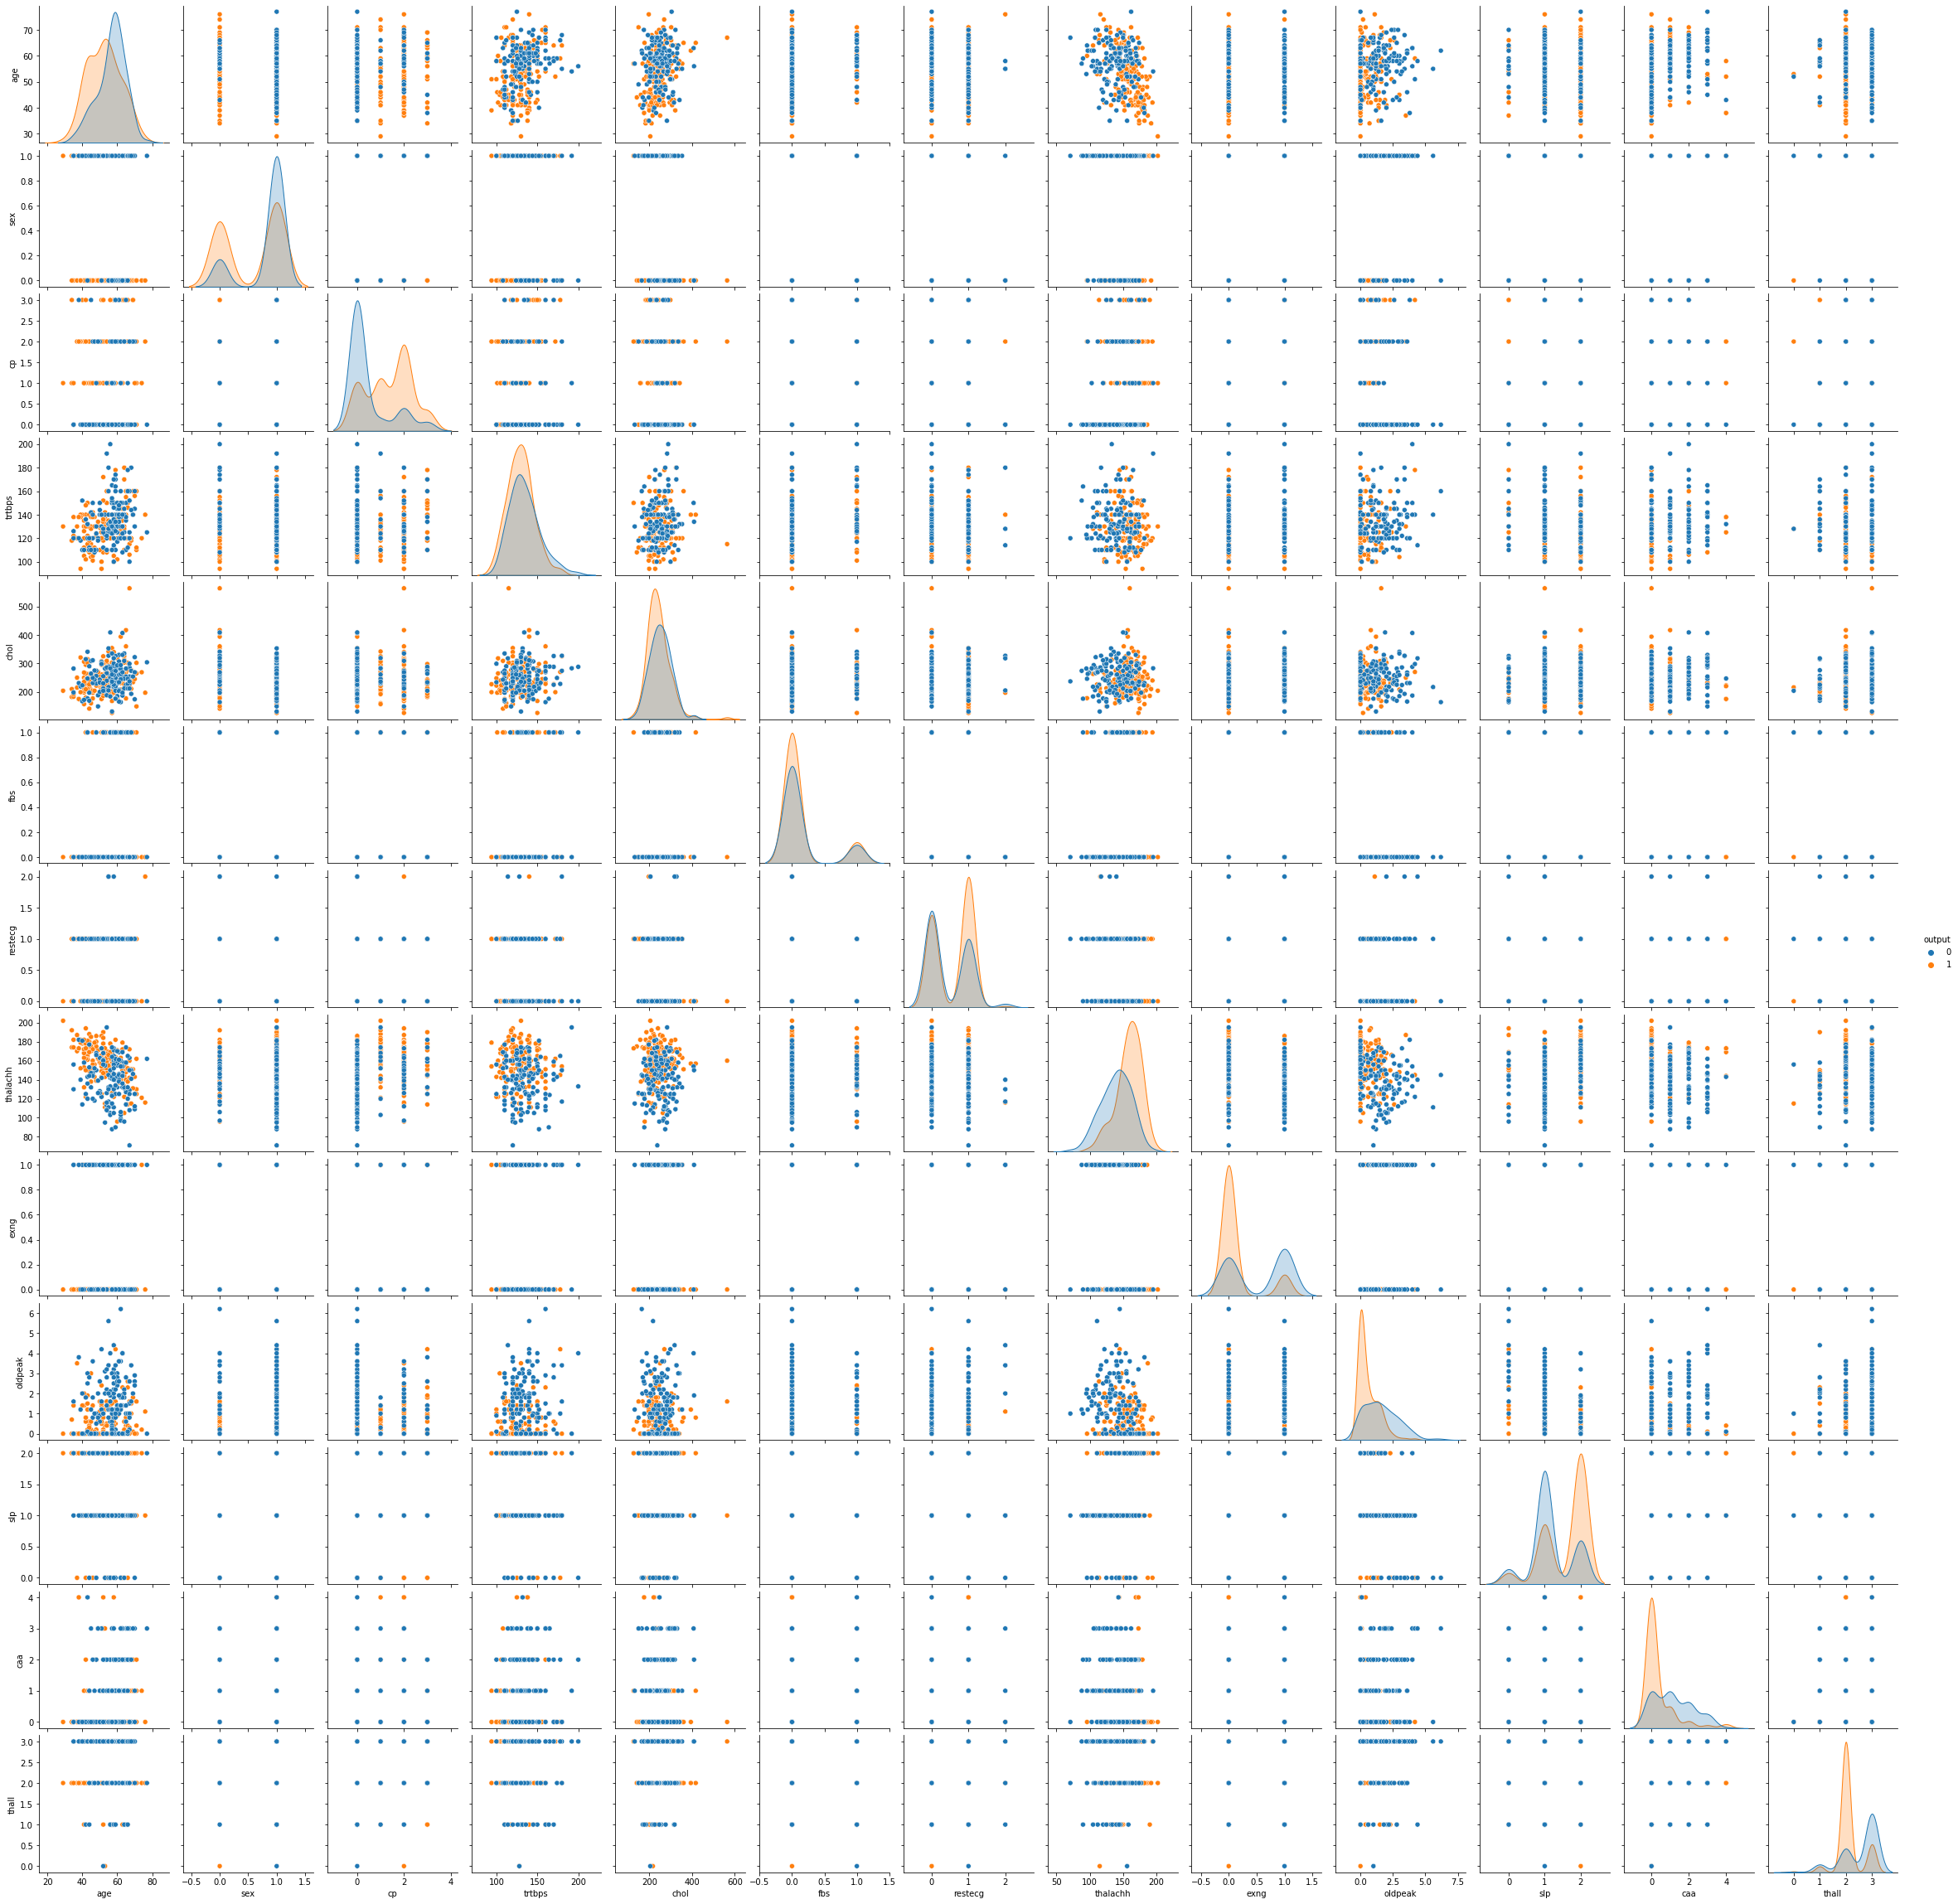

In [ ]:
sns.pairplot(df_heart, hue = 'output')

### Heatmap showing correlation of variables with each other

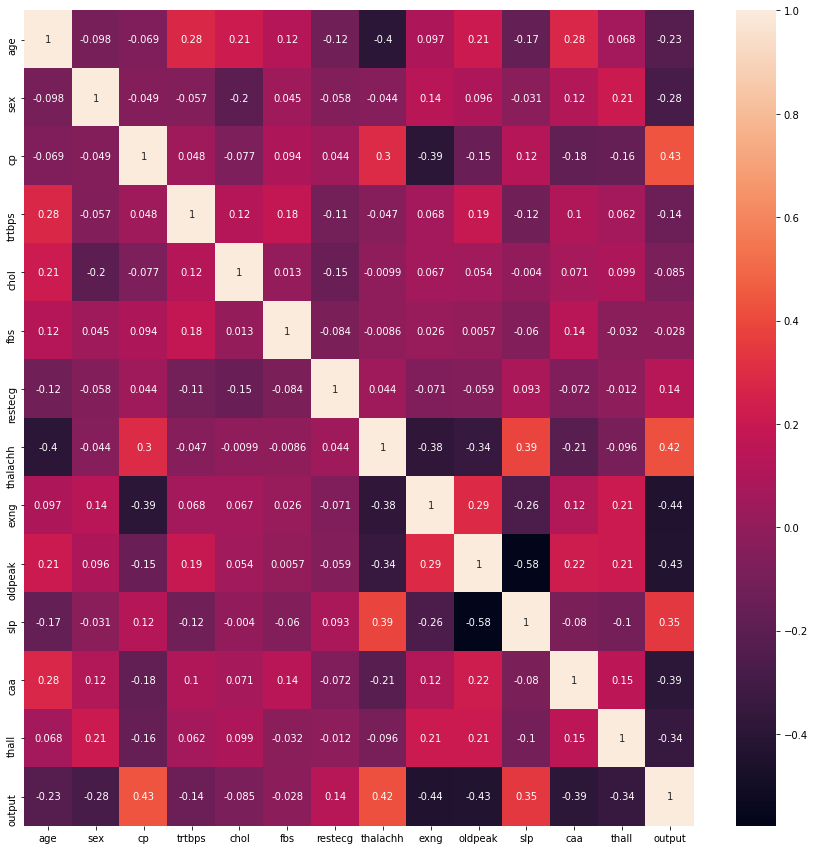

In [ ]:
figure(figsize = (15, 15))
sns.heatmap(df_heart.corr(), annot = True)
plt.show()

### Graph showing the number of patients in a particular age who are having high risks of heart attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


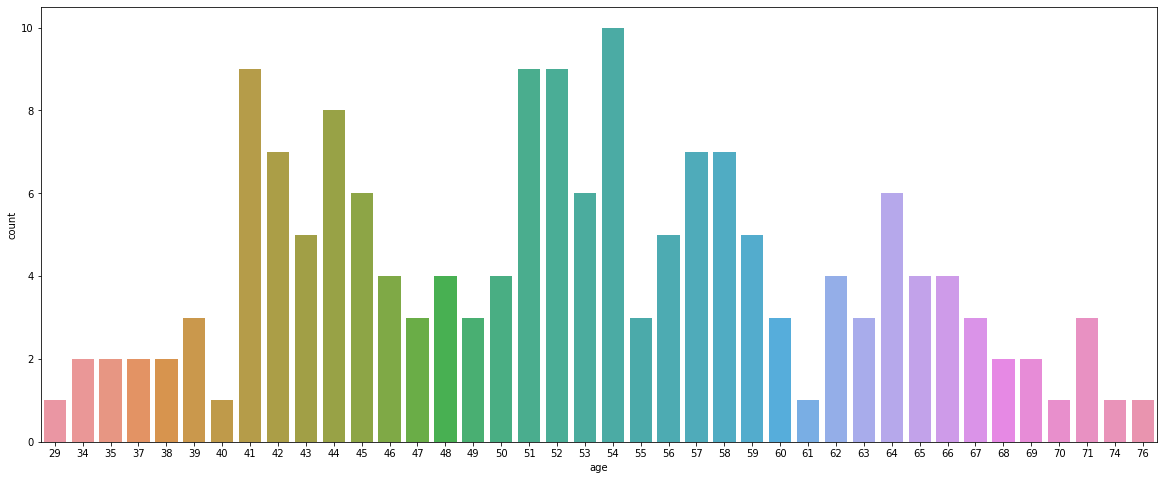

In [ ]:
figure(figsize = (20, 8))
sns.countplot(df_heart.loc[df_heart.output == 1]['age'])
plt.show()

*   People within the age group of 41 - 55 had a high risk of heart attack.
*   With the decrease in age heart attack risk also decreases.
*   People with age group less than 40 had a low risk of heart attack.





### Graph showing relation in 'output' w.r.t change between age and cholestrol 

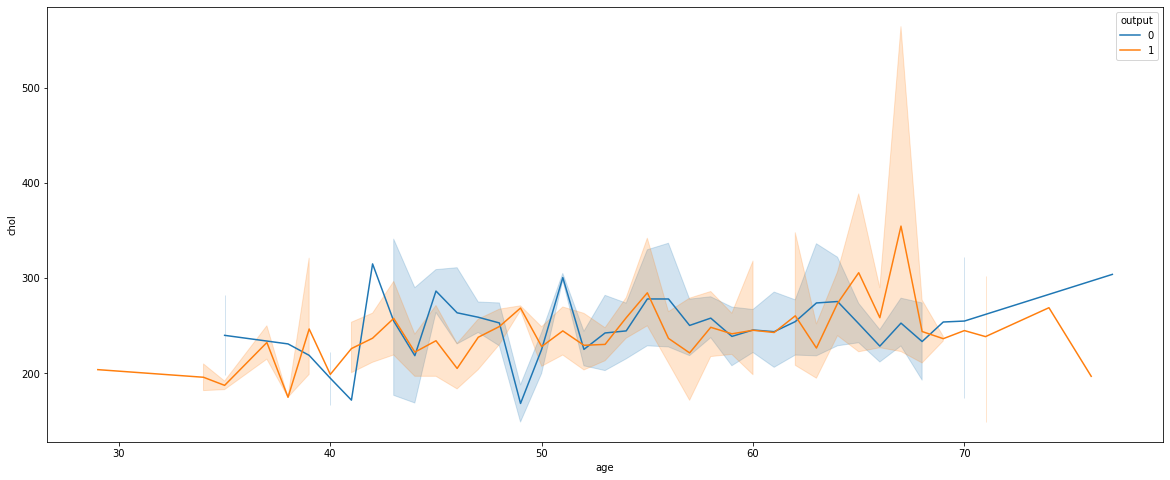

In [ ]:
figure(figsize = (20, 8))
sns.lineplot(x = 'age', y = 'chol', hue = 'output', data = df_heart)
plt.show()

Normal cholestrol level should be in the range of 120-200, but the graph shows that cholestrol level is more than 200.

Moreover, also graph shows that in the age group of 50-70 cholestrol level is much high, so with increase in age cholestrol level also increases, resulting in a high chance of heart attack.

In [ ]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Graph showing relation in 'output' w.r.t change between age and blood pressure

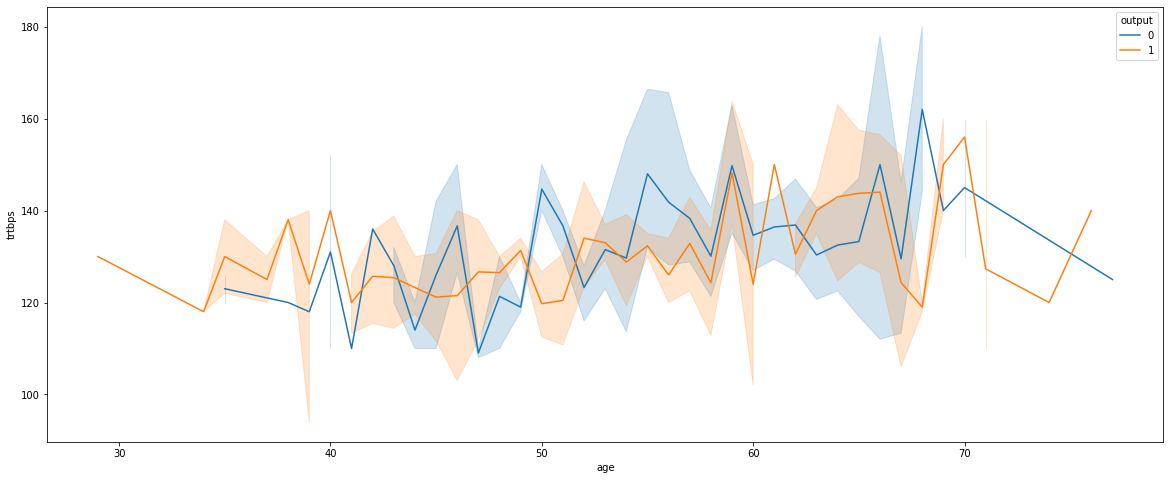

In [ ]:
figure(figsize = (20, 8))
sns.lineplot(x = 'age', y = 'trtbps', hue = 'output', data = df_heart)
plt.show()

With the increase in age, blood pressure also increases, which results in higher risks of heart attack.

The affected age group is 50-70.

### Graph showing relation in 'output' w.r.t change between age and blood sugar

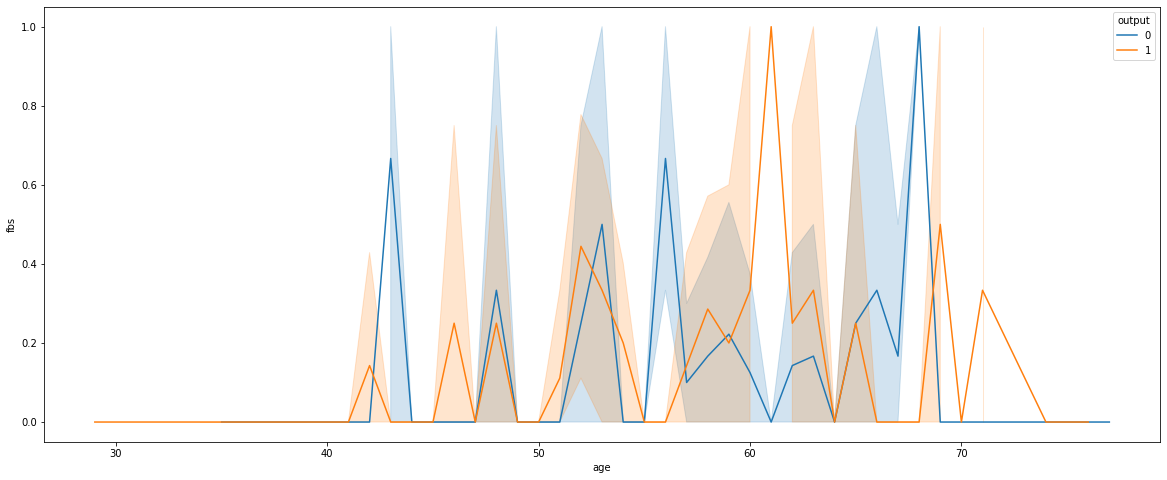

In [ ]:
figure(figsize = (20, 8))
sns.lineplot(x = 'age', y = 'fbs', hue = 'output', data = df_heart)
plt.show()

As, no particular inference can be drawn from this graph, it can be said that heart attack has no relation with fbs(fasting blood sugar).

In [ ]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Modeling 

---
### Separating target and dependent variables



In [ ]:
X = df_heart.drop(['fbs', 'sex', 'oldpeak', 'slp', 'caa', 'thall', 'output'], axis = 'columns')
X

,age,cp,trtbps,chol,restecg,thalachh,exng
0,63,3,145,233,0,150,0
1,37,2,130,250,1,187,0
2,41,1,130,204,0,172,0
3,56,1,120,236,1,178,0
4,57,0,120,354,1,163,1
...,...,...,...,...,...,...,...
298,57,0,140,241,1,123,1
299,45,3,110,264,1,132,0
300,68,0,144,193,1,141,0
301,57,0,130,131,1,115,1


In [ ]:
y = df_heart.output
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

#### Using train test split and Random Forest for tarining model

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [ ]:
model = rfc()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Accuracy of the model 🎯

In [ ]:
model.score(X_test, y_test)

0.819672131147541

In [ ]:
y_pred = model.predict(X_test)

#### F1 score of the model 

In [ ]:
f1_score(y_test, y_pred)

0.9705882352941176

## Inferences 📊

---




*   The age group which has a higher risk of heart attacks in the group of 41 - 55.
*   With the increse in age, cholestrol level increases.
*   With the increse in age, blood pressure increases.
*   There is no relation between blood sugar and heart attack chances.



